<a href="https://colab.research.google.com/github/rsaran-BioAI/AGILE/blob/main/SMILES_VAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Connecting the drive with Colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading the data from the spreadsheet to understand its structure, especially the SMILES strings.
The spreadsheet contains a column named 'smiles' with SMILES strings, along with numerous other unnamed columns that seem to contain NaN values.
We will focus on the 'smiles' column for the one-hot encoding process.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd

In [ ]:
# Load the spreadsheet
file_path = '/content/drive/MyDrive/AGILE2/SMILES_features.csv'
smiles_data = pd.read_csv(file_path)

In [ ]:
# Extracting SMILES strings
smiles_list = smiles_data['smiles'].tolist()

In [ ]:
# Display the first few rows to understand the data
smiles_data.head()

,smiles,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 353,Unnamed: 354,Unnamed: 355,Unnamed: 356,Unnamed: 357,Unnamed: 358,Unnamed: 359,Unnamed: 360,Unnamed: 361,Unnamed: 362
0,CCCCCCCC\C=C/CCCCCCCCNC(=O)C(CCCCCOC(=O)CCCCCC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CCCCCCCCCCCCCCCCCCNC(=O)C(CCCCCOC(=O)CCCCCCC\C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CCCCCCCCCCCCNC(=O)C(CCCCCOC(=O)CCCCCCC\C=C/CCC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CCCCCCCCCCCCCCNC(=O)C(CCCCCOC(=O)CCCCCCC\C=C/C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CCCCCCCCCCCCCCCCNC(=O)C(CCCCCOC(=O)CCCCCCC\C=C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Extracting SMILES strings
smiles_list = smiles_data['smiles'].tolist()

In [ ]:
# Printing the number of SMILES strings in the list
print(len(smiles_list))

1200


In [ ]:
# Identifying the set of unique characters in all SMILES strings
unique_chars = set(''.join(smiles_list))

In [ ]:
# Mapping each character to an integer and vice-versa
char_to_int = dict((c, i) for i, c in enumerate(unique_chars))
int_to_char = dict((i, c) for i, c in enumerate(unique_chars))

In [ ]:
print(char_to_int)

{'O': 0, '\\': 1, '(': 2, ')': 3, '/': 4, '=': 5, '#': 6, '1': 7, 'N': 8, 'C': 9}


In [ ]:
print(int_to_char)

{0: 'O', 1: '\\', 2: '(', 3: ')', 4: '/', 5: '=', 6: '#', 7: '1', 8: 'N', 9: 'C'}


In [ ]:
# Including space character in the unique characters set
unique_chars.add(' ')

# Updating the mappings
char_to_int = dict((c, i) for i, c in enumerate(unique_chars))
int_to_char = dict((i, c) for i, c in enumerate(unique_chars))

In [ ]:
print(char_to_int)
print(int_to_char)

{'O': 0, ' ': 1, '\\': 2, '(': 3, ')': 4, '/': 5, '=': 6, '#': 7, '1': 8, 'N': 9, 'C': 10}
{0: 'O', 1: ' ', 2: '\\', 3: '(', 4: ')', 5: '/', 6: '=', 7: '#', 8: '1', 9: 'N', 10: 'C'}


In [ ]:
# Maximum length of SMILES strings for padding
max_smiles_length = max(len(s) for s in smiles_list)
print(max_smiles_length)

80


In [ ]:
print(smiles_list[0])
print(len(smiles_list[0]))

CCCCCCCC\C=C/CCCCCCCCNC(=O)C(CCCCCOC(=O)CCCCCCC\C=C/CCCCCCCC)NCCCN(C)CCCN
73


In [ ]:
import torch

In [ ]:
# One-hot encoding function using PyTorch
def one_hot_encode_pytorch(smiles, max_length, char_to_int_map):
    # Padding SMILES strings to the maximum length
    smiles_padded = smiles.ljust(max_length)
    print(smiles_padded)

    # Encoding each character as a one-hot vector using PyTorch
    one_hot_encoded = torch.zeros(max_length, len(char_to_int_map))
    for i, char in enumerate(smiles_padded):
        one_hot_encoded[i, char_to_int_map[char]] = 1
    return one_hot_encoded

In [ ]:
test_encoded_torch = one_hot_encode_pytorch(smiles_list[0], max_smiles_length, char_to_int)

CCCCCCCC\C=C/CCCCCCCCNC(=O)C(CCCCCOC(=O)CCCCCCC\C=C/CCCCCCCC)NCCCN(C)CCCN       


In [ ]:
print(test_encoded_torch.shape)
print(test_encoded_torch)

torch.Size([80, 11])
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       

In [ ]:
# List to store the encoded SMILES
encoded_smiles_list = []

# Iterate over each SMILES string and encode it
for smiles in smiles_list:
    encoded_smiles = one_hot_encode_pytorch(smiles, max_smiles_length, char_to_int)
    encoded_smiles_list.append(encoded_smiles)

# Converting list to a PyTorch tensor
encoded_smiles_tensor = torch.stack(encoded_smiles_list)

# Now encoded_smiles_tensor contains all the one-hot encoded SMILES strings

CCCCCCCC\C=C/CCCCCCCCNC(=O)C(CCCCCOC(=O)CCCCCCC\C=C/CCCCCCCC)NCCCN(C)CCCN       
CCCCCCCCCCCCCCCCCCNC(=O)C(CCCCCOC(=O)CCCCCCC\C=C/CCCCCCCC)NCCCN(C)CCCN          
CCCCCCCCCCCCNC(=O)C(CCCCCOC(=O)CCCCCCC\C=C/CCCCCCCC)NCCCN(C)CCCN                
CCCCCCCCCCCCCCNC(=O)C(CCCCCOC(=O)CCCCCCC\C=C/CCCCCCCC)NCCCN(C)CCCN              
CCCCCCCCCCCCCCCCNC(=O)C(CCCCCOC(=O)CCCCCCC\C=C/CCCCCCCC)NCCCN(C)CCCN            
CCCCCCCC\C=C/CCCCCCCCNC(=O)C(CCCCCOC(=O)CCCCCCC\C=C/CCCCCCCC)NCC1CCCN1CC        
CCCCCCCCCCCCCCCCCCNC(=O)C(CCCCCOC(=O)CCCCCCC\C=C/CCCCCCCC)NCC1CCCN1CC           
CCCCCCCCCCCCNC(=O)C(CCCCCOC(=O)CCCCCCC\C=C/CCCCCCCC)NCC1CCCN1CC                 
CCCCCCCCCCCCCCNC(=O)C(CCCCCOC(=O)CCCCCCC\C=C/CCCCCCCC)NCC1CCCN1CC               
CCCCCCCCCCCCCCCCNC(=O)C(CCCCCOC(=O)CCCCCCC\C=C/CCCCCCCC)NCC1CCCN1CC             
CCCCCCCC\C=C/CCCCCCCCNC(=O)C(CCCCCOC(=O)CCCCCCC\C=C/CCCCCCCC)NCCN1CCNCC1        
CCCCCCCCCCCCCCCCCCNC(=O)C(CCCCCOC(=O)CCCCCCC\C=C/CCCCCCCC)NCCN1CCNCC1           
CCCCCCCCCCCCNC(=O)C(CCCCCOC(

In [ ]:
print(encoded_smiles_tensor.shape)

torch.Size([1200, 80, 11])


In [ ]:
from torch.utils.data import Dataset, DataLoader

class SMILESDataset(Dataset):
    def __init__(self, encoded_smiles):
        self.encoded_smiles = encoded_smiles

    def __len__(self):
        return len(self.encoded_smiles)

    def __getitem__(self, idx):
        return self.encoded_smiles[idx]

In [ ]:
# Create an instance of your custom dataset
smiles_dataset = SMILESDataset(encoded_smiles_tensor)

In [ ]:
from torch.utils.data.dataset import random_split

# Define the ratio for splitting
train_ratio = 0.8
train_size = int(len(encoded_smiles_tensor) * train_ratio)
test_size = len(encoded_smiles_tensor) - train_size

# Split the dataset into training and test sets
train_dataset, test_dataset = random_split(smiles_dataset, [train_size, test_size])

# Define batch size
batch_size = 32

# Create data loaders for training and test sets
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
print(train_dataloader)

In [ ]:
def check_data(dataloader):
    for batch_idx, (data) in enumerate(dataloader):
        # Assuming 'data' is a torch.Tensor
        unique_values = torch.unique(data)  # Get unique values in the batch
        if not torch.all((unique_values == 0) | (unique_values == 1)):
            return False  # Return False if there are values other than 0 or 1
    return True  # Return True if all batches contain only 0s and 1s

# Usage
is_binary = check_data(train_dataloader)
print(f"All data in train_dataloader are 0s and 1s: {is_binary}")

All data in train_dataloader are 0s and 1s: True


In [ ]:
# Usage
is_binary = check_data(test_dataloader)
print(f"All data in test_dataloader are 0s and 1s: {is_binary}")

All data in test_dataloader are 0s and 1s: True


In [ ]:
# Iterating through the data loader

for X in test_dataloader:
    print(f"Shape of X: {X.shape}")

Shape of X: torch.Size([32, 80, 11])
Shape of X: torch.Size([32, 80, 11])
Shape of X: torch.Size([32, 80, 11])
Shape of X: torch.Size([32, 80, 11])
Shape of X: torch.Size([32, 80, 11])
Shape of X: torch.Size([32, 80, 11])
Shape of X: torch.Size([32, 80, 11])
Shape of X: torch.Size([16, 80, 11])


In [ ]:
for y in test_dataloader:
    print(f"Shape of y: {y.shape}")

Shape of y: torch.Size([32, 80, 11])
Shape of y: torch.Size([32, 80, 11])
Shape of y: torch.Size([32, 80, 11])
Shape of y: torch.Size([32, 80, 11])
Shape of y: torch.Size([32, 80, 11])
Shape of y: torch.Size([32, 80, 11])
Shape of y: torch.Size([32, 80, 11])
Shape of y: torch.Size([16, 80, 11])


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# Variational Autoencoder Definition
class VAE(nn.Module): # 'VAE' inherits from 'nn.Module', which is the base class for all neural network modules in PyTorch.
    def __init__(self):
        super(VAE, self).__init__()

        # Encoder
        self.fc1 = nn.Linear(80*11, 500) # The encoder part of the VAE consists of two fully connected (Linear) layers that map the input image (flattened to 28*28 pixels) to a hidden layer of size 400.
                                         # The flattening of the input image is done implicitly within the forward method of the VAE class instead of using a separate flatten method or layer.

        # From this hidden layer, two separate fully connected layers (fc21 and fc22) output the mean and logarithm of variance for the latent space, respectively.
        self.fc21 = nn.Linear(500, 15) # Mean vector
        self.fc22 = nn.Linear(500, 15) # Variance vector (log_var)

        # decoder
        self.fc3 = nn.Linear(15, 500) # The decoder part consists of two fully connected layers that aim to reconstruct the image from the latent space representation.
        self.fc4 = nn.Linear(500, 80*11)

    def encode(self, x): # The encode function applies a ReLU activation to the output of the first layer, then it outputs the parameters for the latent distribution.
        h1 = F.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)

    def reparameterize(self, mu, logvar): # reparameterize is a trick to allow backpropagation through random sampling. It adds a random element eps scaled by the standard deviation (std) to the mean mu.
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z): # The decode function attempts to reconstruct the input data from the latent variable z.
        h3 = F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3)) # the sigmoid function is applied to ℎ4 to produve teh reconstruction X' ensuring that the output values are between 0 and 1 (as pixel values)

    def forward(self, x): # The forward method ties everything together.

        # Flatten the input and print the flattened shape
        x_flattened = x.view(-1, 80*11)

        # Encode
        mu, logvar = self.encode(x_flattened)

        # Reparameterization trick
        z = self.reparameterize(mu, logvar)
        print("Latent z shape:", z.shape)

        # Decode
        recon_x = self.decode(z)

        # Apply final activation (sigmoid) and print the shape
        recon_x = torch.sigmoid(recon_x)

        return recon_x, mu, logvar

In [ ]:
# Instantiate the model
model = VAE() # This line creates an instance of the VAE class, which we have defined previously.

In [ ]:
def print_model_parameters(model):
    for name, parameter in model.named_parameters():
        print(f"{name}.shape: {parameter.shape}")

# Instantiate the model
model = VAE()

# Print model parameters
print_model_parameters(model)

fc1.weight.shape: torch.Size([500, 880])
fc1.bias.shape: torch.Size([500])
fc21.weight.shape: torch.Size([15, 500])
fc21.bias.shape: torch.Size([15])
fc22.weight.shape: torch.Size([15, 500])
fc22.bias.shape: torch.Size([15])
fc3.weight.shape: torch.Size([500, 15])
fc3.bias.shape: torch.Size([500])
fc4.weight.shape: torch.Size([880, 500])
fc4.bias.shape: torch.Size([880])


In [ ]:
# Loss function
def loss_function(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 80*11), reduction='sum') # The binary cross-entropy between the input data and the reconstructed data, encouraging the VAE to accurately reconstruct the input.
    # KL divergence regularization term.
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp()) # This term acts as a regularizer, enforcing the latent distribution to be close to the standard normal distribution.
    return BCE + KLD

In [ ]:
# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
# Training Loop
def train_loop(dataloader, model, loss_fn, optimizer): # This line defines a function named train_loop that takes four parameters:
                                                       # dataloader: Provides batches of data from the training set.
                                                       # model: The VAE model to be trained.
                                                       # loss_fn: The loss function to use, which in the case of a VAE, usually combines reconstruction loss with KL divergence.
                                                       # optimizer: The optimization algorithm to adjust model parameters.
    model.train() # Before starting the loop, we set the model to training mode.
                  # This is important because some models may use mechanisms like dropout or batch normalization that have distinct behaviors during training versus evaluation (testing).
    train_loss = 0 # Initialize loss accumulator - This initializes a variable to accumulate the loss over all batches. This will be used to calculate the average loss at the end of the epoch.
    for batch_idx, data in enumerate(dataloader): # Training loop over batches - This starts a loop over the dataloader, providing a batch index (batch_idx) and data
                                                       # Each data item is a batch of SMILES codes.
        optimizer.zero_grad() # Zero the parameter gradients - This resets all gradients in the model parameters before calculating the new gradients for the current batch.
                              # If this step is skipped, gradients would accumulate across batches, which is not the desired behavior for most training scenarios.
        recon_batch, mu, logvar = model(data) # Forward pass - This line runs a forward pass of the data through the model. The model returns the reconstructed batch, the mean mu, and the log variance logvar of the latent variables.
        loss = loss_function(recon_batch, data, mu, logvar) # Loss computation - The loss_fn is called with the model's output and the original data to compute the loss for the batch.
                                                      # The function combines the reconstruction loss and the KL divergence loss.
        loss.backward() # Backward pass - This computes the gradient of the loss with respect to the model parameters by backpropagation.
        train_loss += loss.item() # Accumulate loss - Here, we add up the scalar loss of the current batch to the total train_loss for later calculation of the average loss.
        optimizer.step() # Parameter update - This line updates the model parameters based on the gradients computed during .backward().

        if batch_idx % 100 == 0: # Logging - This conditional statement checks if the batch index is a multiple of 100.
                                 # If it is, it logs the current loss averaged over the data in the batch. This provides feedback on the training progress.
            print(f"Train Epoch: {batch_idx} Loss: {loss.item() / len(data):.6f}")

    print(f"====> Epoch: Train loss: {train_loss / len(dataloader.dataset):.6f}") # After all batches are processed, this line prints the average loss over the entire dataset.
                                                                                  # The total train_loss is divided by the number of samples in the dataset (len(dataloader.dataset)) to get the average loss per sample.

In [ ]:
# Train the VAE
epochs = 50 # This sets the epochs variable to 10, meaning that the entire training dataset will be passed through the VAE model ten times.
for epoch in range(1, epochs + 1): # Training Epoch Loop - This is a loop that will iterate epochs times, starting from 1 and going up to and including epochs.
                                   # The range(1, epochs + 1) function generates a sequence of numbers from 1 to epochs, which is used to track the current epoch number.
    train_loop(train_dataloader, model, loss_function, optimizer)

Latent z shape: torch.Size([32, 15])
Train Epoch: 0 Loss: 595.644104
Latent z shape: torch.Size([32, 15])
Latent z shape: torch.Size([32, 15])
Latent z shape: torch.Size([32, 15])
Latent z shape: torch.Size([32, 15])
Latent z shape: torch.Size([32, 15])
Latent z shape: torch.Size([32, 15])
Latent z shape: torch.Size([32, 15])
Latent z shape: torch.Size([32, 15])
Latent z shape: torch.Size([32, 15])
Latent z shape: torch.Size([32, 15])
Latent z shape: torch.Size([32, 15])
Latent z shape: torch.Size([32, 15])
Latent z shape: torch.Size([32, 15])
Latent z shape: torch.Size([32, 15])
Latent z shape: torch.Size([32, 15])
Latent z shape: torch.Size([32, 15])
Latent z shape: torch.Size([32, 15])
Latent z shape: torch.Size([32, 15])
Latent z shape: torch.Size([32, 15])
Latent z shape: torch.Size([32, 15])
Latent z shape: torch.Size([32, 15])
Latent z shape: torch.Size([32, 15])
Latent z shape: torch.Size([32, 15])
Latent z shape: torch.Size([32, 15])
Latent z shape: torch.Size([32, 15])
Latent

In [117]:
# Testing Loop
def test_loop(dataloader, model, loss_fn): # This line defines a function called test_loop that will be used to evaluate the model's performance on the test dataset. The function takes three parameters:
                                           # dataloader: An iterator that provides batches of data from the test dataset.
                                           # model: The VAE model that has been trained and will now be evaluated.
                                           # loss_fn: The loss function that the model will be evaluated against.
    model.eval() # This sets the model to evaluation mode. It's necessary because some models may use layers such as dropout or batch normalization which behave differently during training than during testing.
    test_loss = 0 # Initialize Loss Accumulator - This initializes a variable to accumulate the total loss across all test data batches.
    all_recon_batches = []

    with torch.no_grad(): # Disable gradient calculations - This context manager tells PyTorch that no gradients should be calculated for the operations performed inside the block.
                          # This is important during testing because it reduces memory consumption and increases computation speed since gradients are not needed.
        for data in dataloader: # Test Loop Over Batches - This loops over each batch in the dataloader.
                                   # Here data contains the input images and _ is a placeholder for labels which are not used during the testing of an autoencoder.
            recon_batch, mu, logvar = model(data) # Model Forward Pass - Within the loop, we pass the data through the model to get the reconstructed batch...
                                                  # ...as well as the mu and logvar that represent the mean and logarithm of the variance of the latent distribution, respectively.
            test_loss += loss_function(recon_batch, data, mu, logvar).item() # Here, we compute the loss for the current batch using the loss_fn, which is typically the same loss function used during training...
                                                                       # ...combining reconstruction error and KL divergence.
                                                                       # We add the loss for the current batch to the total test_loss. The .item() method is used to get the scalar value of the loss tensor.
            all_recon_batches.append(recon_batch)

    test_loss /= len(dataloader.dataset) # Compute Average Test Loss - After iterating over all test batches, we calculate the average test loss by dividing the total test_loss by the number of samples in the test dataset.
    print(f"====> Test set loss: {test_loss:.6f}") # Print Average Test Loss - Finally, we print out the average test loss formatted to six decimal places.
                                                   # This gives us a single value that summarizes the performance of the model on the entire test dataset.
    return all_recon_batches
    print(len(all_recon_batches))


In [118]:
new_recon_batch = test_loop(test_dataloader, model, loss_function)

Latent z shape: torch.Size([32, 15])
Latent z shape: torch.Size([32, 15])
Latent z shape: torch.Size([32, 15])
Latent z shape: torch.Size([32, 15])
Latent z shape: torch.Size([32, 15])
Latent z shape: torch.Size([32, 15])
Latent z shape: torch.Size([32, 15])
Latent z shape: torch.Size([16, 15])
====> Test set loss: 592.832023


In [119]:
print(new_recon_batch)

[tensor([[0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
        ...,
        [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000]]), tensor([[0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
        ...,
        [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000]]), tensor([[0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
        .

In [ ]:
# Set the model to evaluation mode
#model.eval()

# Number of samples to generate
#num_samples = 10

# Sample from the latent space
#new = torch.randn(num_samples, 15)

# Pass the samples through the decoder
# Ensure to move z to the same device as your model (e.g., CPU, GPU)
#with torch.no_grad():
#    new_samples = model.decode(new)

In [ ]:
# for i in range(1,11):
# print(new_samples[1,:])
# temp = new_samples[1,:]
# reshaped_samples = temp.reshape(80, 11)
# print(reshaped_samples)

In [ ]:
# reshaped_samples = new_recon_batch.reshape(16, 80, 11)
# print(reshaped_samples)

In [123]:
reshaped_recon_batches = [batch.view(batch.size(0), 80, 11) for batch in new_recon_batch]

In [133]:
reshaped_recon_binary = []
threshold = 0.5  # Common choice for binary data

# Assuming reshaped_recon_batches is already defined and contains the reshaped batches
for batch in reshaped_recon_batches:
    binary_batch = (batch > threshold).int()
    reshaped_recon_binary.append(binary_batch)

In [135]:
print(len(reshaped_recon_binary))
print(reshaped_recon_binary[0])

8
tensor([[[0, 0, 0,  ..., 0, 0, 1],
         [0, 0, 0,  ..., 0, 0, 1],
         [0, 0, 0,  ..., 0, 0, 1],
         ...,
         [0, 1, 0,  ..., 0, 0, 0],
         [0, 1, 0,  ..., 0, 0, 0],
         [0, 1, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 1],
         [0, 0, 0,  ..., 0, 0, 1],
         [0, 0, 0,  ..., 0, 0, 1],
         ...,
         [0, 1, 0,  ..., 0, 0, 0],
         [0, 1, 0,  ..., 0, 0, 0],
         [0, 1, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 1],
         [0, 0, 0,  ..., 0, 0, 1],
         [0, 0, 0,  ..., 0, 0, 1],
         ...,
         [0, 1, 0,  ..., 0, 0, 0],
         [0, 1, 0,  ..., 0, 0, 0],
         [0, 1, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 1],
         [0, 0, 0,  ..., 0, 0, 1],
         [0, 0, 0,  ..., 0, 0, 1],
         ...,
         [0, 1, 0,  ..., 0, 0, 0],
         [0, 1, 0,  ..., 0, 0, 0],
         [0, 1, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 1],
         [0, 0, 0,  ..., 0, 0, 1],
         [

In [136]:
!pip install rdkit

In [137]:
from rdkit import Chem
from rdkit.Chem import Draw

In [149]:
# Your mapping from index to character
padding_index = 11  # Define the padding index

def tensor_to_smiles(reshaped_recon_binary):
    new_smiles_list = []
    for batch in reshaped_recon_binary:
        for sample in batch:
           # Convert one-hot to indices
           indices = torch.argmax(sample, dim=1)
           # Map indices to characters and concatenate
           smiles = ''.join([int_to_char[index.item()] for index in indices if index.item() != padding_index])
           new_smiles_list.append(smiles)
    return new_smiles_list

In [150]:
# Convert tensor to SMILES strings
smiles_strings = tensor_to_smiles(reshaped_recon_binary)

In [151]:
print(len(smiles_strings))

240


In [152]:
# Printing SMILES strings
for i, smiles in enumerate(smiles_strings):
    print(f"SMILES {i+1}: {smiles}")

SMILES 1: CCCCCCCCCCCCCCCCCC()O)O)C(CCCCCOC(=O)CCCCCCCCCCCCCCCCCC                         
SMILES 2: CCCCCCCC\C=C/C(=O)O(CCC(=O)((O)CCCOC(=O)CCCCCCCCCCCCCCC                         
SMILES 3: CCCCCCCC\C=C/CCCCCNCO=O(=O)C(CCOC(OO(=O)CCCCCCCCCCCCCCCC                        
SMILES 4: CCCCCCCC\C=C/C(=O)N(O=O(=O)((O)OC(OO(=O)CCCCCCCCCCCCCCC                         
SMILES 5: CCCCCCCCCCCCCCCCC=O=O)O)C(CCCOCOO(=O)CCCCCCCCCCCCCCCCCCCCCCC                    
SMILES 6: CCCCCCCCCCCCNC(=O)O(CCCCCOC(=O)CCCCCCCCCCCCCCCCCCCCCCCC                         
SMILES 7: CCCCCCCCCCCCNC(=O)O(OCCCCOC(=O)CCCCCCCCCCCCCOCCCCCCCCCC                         
SMILES 8: CCCCCCCC\C=C/CCCCCNC(=O(=O)C(CCOC(OO(=O)CCCCCCCCCCCCCCCCCCCC                    
SMILES 9: CCCCCCCCCCCCCCCCC=O=O)OCCCCCCOCOOOOCCCCCCCCCCCCCCCCCCCCC                        
SMILES 10: CCCCCCCC\C=C/C(=O)O(CCC(=O)((O)CCCOC(=O)CCOCCCCCCCCCCCC                         
SMILES 11: CCCCCCCCCCCCNC(=O)O(O)OCCCC(=O)OCCCCCCCCCCCCCCCCCCCCCCC                       

In [153]:
# Convert SMILES to RDKit molecule objects
molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles_strings]
print(molecules)

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, Non

[18:09:54] SMILES Parse Error: syntax error while parsing: CCCCCCCCCCCCCCCCCC()O)O)C(CCCCCOC(=O)CCCCCCCCCCCCCCCCCC
[18:09:54] SMILES Parse Error: Failed parsing SMILES 'CCCCCCCCCCCCCCCCCC()O)O)C(CCCCCOC(=O)CCCCCCCCCCCCCCCCCC' for input: 'CCCCCCCCCCCCCCCCCC()O)O)C(CCCCCOC(=O)CCCCCCCCCCCCCCCCCC'
[18:09:54] SMILES Parse Error: syntax error while parsing: CCCCCCCC\C=C/C(=O)O(CCC(=O)((O)CCCOC(=O)CCCCCCCCCCCCCCC
[18:09:54] SMILES Parse Error: Failed parsing SMILES 'CCCCCCCC\C=C/C(=O)O(CCC(=O)((O)CCCOC(=O)CCCCCCCCCCCCCCC' for input: 'CCCCCCCC\C=C/C(=O)O(CCC(=O)((O)CCCOC(=O)CCCCCCCCCCCCCCC'
[18:09:54] SMILES Parse Error: extra open parentheses for input: 'CCCCCCCC\C=C/CCCCCNCO=O(=O)C(CCOC(OO(=O)CCCCCCCCCCCCCCCC'
[18:09:54] SMILES Parse Error: syntax error while parsing: CCCCCCCC\C=C/C(=O)N(O=O(=O)((O)OC(OO(=O)CCCCCCCCCCCCCCC
[18:09:54] SMILES Parse Error: Failed parsing SMILES 'CCCCCCCC\C=C/C(=O)N(O=O(=O)((O)OC(OO(=O)CCCCCCCCCCCCCCC' for input: 'CCCCCCCC\C=C/C(=O)N(O=O(=O)((O)OC(OO(=O)CCCCCCCC

/usr/local/lib/python3.10/dist-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


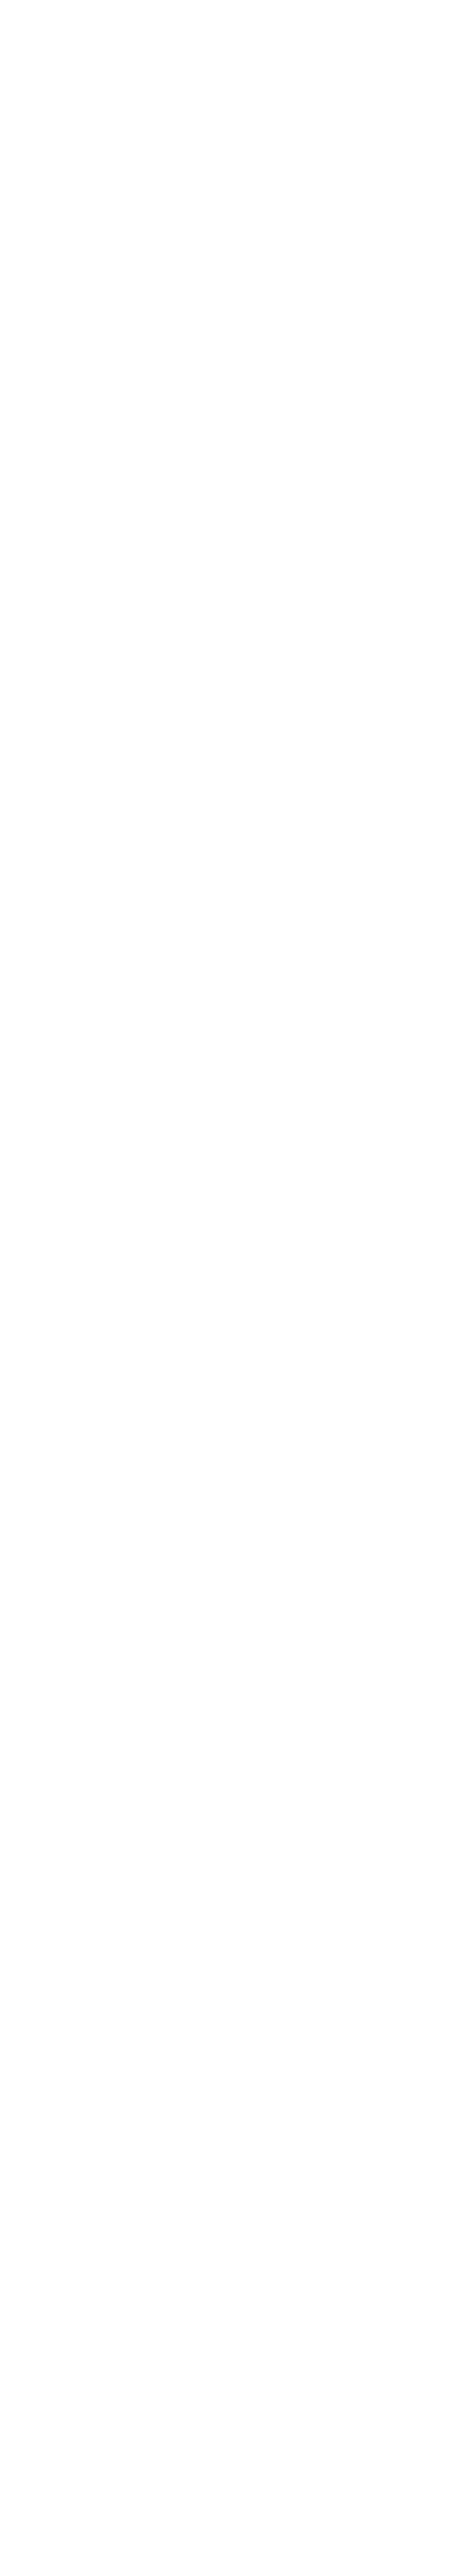

In [154]:
img = Draw.MolsToGridImage(molecules, molsPerRow=3, subImgSize=(200, 200))
img